# Credit Card Default Prediction Version 1

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing billing details and receive a categorical (yes or no) output indicating if the customer defaults to using their credit card.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Store CSV file in variable 
data = r'..\..\data\default_of_credit_card_clients_v2.xls'
# Read CSV file in pandas dataframe 
df = pd.read_excel(data)

In [5]:
# Print dataframe to confirm successful loading
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Column Meanings 

**LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**SEX**: Gender (1 = male; 2 = female).

**EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others).

**AGE**: Age (year).

**PAY_0** - **PAY_6**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: *PAY_0* = the repayment status in September, 2005; *PAY_2* = the repayment status in August, 2005; . . .;*PAY_6* = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**BILL_AMT1** - **BILL_AMT6**: Amount of bill statement (NT dollar). *BILL_AMT1* = amount of bill statement in September, 2005; *BILL_AMT2* = amount of bill statement in August, 2005; . . .; *BILL_AMT6* = amount of bill statement in April, 2005.

**PAY_AMT1** - **PAY_AMT6**: Amount of previous payment (NT dollar). *PAY_AMT1* = amount paid in September, 2005; *PAY_AMT2* = amount paid in August, 2005; . . .;*PAY_AMT6* = amount paid in April, 2005.

### <font color='red'>Target Variable: default_payment_next_month</font>

# Week 1: Data Cleaning and Analysis 

## Data Cleaning

In [10]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Print dataframe to confirm 
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
# Create copy of dataframe in case need to use original later 
copy_df = df[['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
              'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
              'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
               'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
               'default_payment_next_month']]

In [12]:
# Rename columns 
df.rename(columns={'pay_0':'sept_repayment', 'pay_2':'aug_repayment', 'pay_3':'jul_repayment', 'pay_4':'jun_repayment',
                    'pay_5':'may_repayment', 'pay_6':'apr_repayment', 
                    'bill_amt1':'sept_bill', 'bill_amt2':'aug_bill', 'bill_amt3':'jul_bill', 'bill_amt4':'jun_bill',
                    'bill_amt5':'may_bill', 'bill_amt6':'apr_bill',
                    'pay_amt1':'sept_paid', 'pay_amt2':'aug_paid', 'pay_amt3':'jul_paid', 'pay_amt4':'jun_paid', 
                    'pay_amt5':'may_paid', 'pay_amt6':'apr_paid'}, inplace=True)

# Print dataframe for renamed columns
df

,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Check columns in correct format with Dtype

In [14]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          30000 non-null  int64
 1   limit_bal                   30000 non-null  int64
 2   sex                         30000 non-null  int64
 3   education                   30000 non-null  int64
 4   marriage                    30000 non-null  int64
 5   age                         30000 non-null  int64
 6   sept_repayment              30000 non-null  int64
 7   aug_repayment               30000 non-null  int64
 8   jul_repayment               30000 non-null  int64
 9   jun_repayment               30000 non-null  int64
 10  may_repayment               30000 non-null  int64
 11  apr_repayment               30000 non-null  int64
 12  sept_bill                   30000 non-null  int64
 13  aug_bill                    30000 non-null  int64
 14  jul_bi

### Check for NULL and Duplicate values

In [16]:
# Check for missing values
print(df.isnull().sum())

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
sept_repayment                0
aug_repayment                 0
jul_repayment                 0
jun_repayment                 0
may_repayment                 0
apr_repayment                 0
sept_bill                     0
aug_bill                      0
jul_bill                      0
jun_bill                      0
may_bill                      0
apr_bill                      0
sept_paid                     0
aug_paid                      0
jul_paid                      0
jun_paid                      0
may_paid                      0
apr_paid                      0
default_payment_next_month    0
dtype: int64


In [17]:
# Check for dupicate entries 
df[df.duplicated()]

,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month


## Exploratory Data Analysis

In [19]:
# View dataset
df

,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,jul_repayment,jun_repayment,...,jun_bill,may_bill,apr_bill,sept_paid,aug_paid,jul_paid,jun_paid,may_paid,apr_paid,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### How many used credit cards?

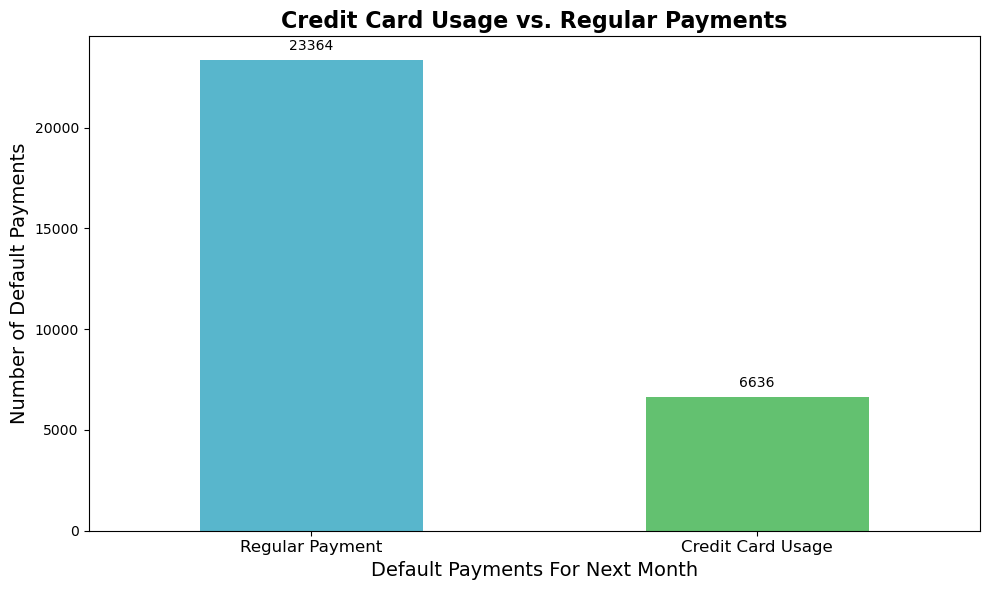

default_payment_next_month
0    77.88
1    22.12
Name: count, dtype: float64


In [21]:
# Count the occurrences of flight delays
default_counts = df['default_payment_next_month'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = default_counts.plot(kind='bar', color=['#58B6CC','#63C170'])

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Default Payments For Next Month', fontsize=14)
plt.ylabel('Number of Default Payments', fontsize=14)
plt.title('Credit Card Usage vs. Regular Payments', fontsize=16, fontweight='bold')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Regular Payment', 'Credit Card Usage'], ha='center', fontsize=12)  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['default_payment_next_month'].value_counts()/df.shape[0]) * 100)

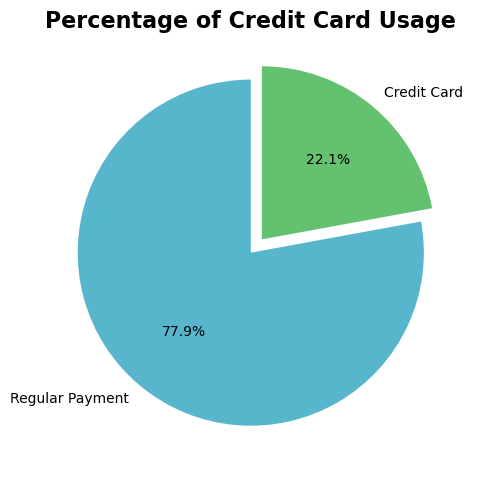

In [22]:
# Visualizing Delayed Flight Percentage

# Extract total number of regular payments and credit card payments
payment, creditCard = df['default_payment_next_month'].value_counts()

# Data and Labels
data = [payment, creditCard]
keys = ['Regular Payment', 'Credit Card']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1], 
    colors=['#58B6CC','#63C170']
)

# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Credit Card Usage', fontsize=16, fontweight='bold')
plt.tight_layout()

# Display the plot
plt.show()

The following dataset clearly shows imbalance that we will take care off later. 

### What distribution do we see for the following columns: education, marriage, sex, repayment status?

In [25]:
# Unique categories in "Education"
print("Unique categories in 'Education':", df['education'].unique())

# Unique categories in "Marital Status"
print("Unique categories in 'Marital Status':", df['marriage'].unique())

# Unique categories in "sept_repayment"
print("Unique categories in 'sex':", df['sex'].unique())

# Unique categories in "sept_repayment"
print("Unique categories in 'sept_repayment':", df['sept_repayment'].unique())

Unique categories in 'Education': [2 1 3 5 4 6 0]
Unique categories in 'Marital Status': [1 2 3 0]
Unique categories in 'sex': [2 1]
Unique categories in 'sept_repayment': [ 2 -1  0 -2  1  3  4  8  7  5  6]


*education*: Undocumented values (0, 5, 6)
- 1 = graduate school
- 2 = university
- 3 = high school
- 4 = others

*marriage (Marital Status)*: Undocumented values (0)
- 1 = married
- 2 = single
- 3 = others
  
*sex (Gender)*: No undocumented values
- 1 = male
- 2 = female

*sept_repayment - apr_repayment*: Undocumented values (-2, 0)
- -1 = pay duly
- 1 = payment delay for one month
- 2 = payment delay for two months
-  . . .
-  8 = payment delay for eight months
-  9 = payment delay for nine months and above.

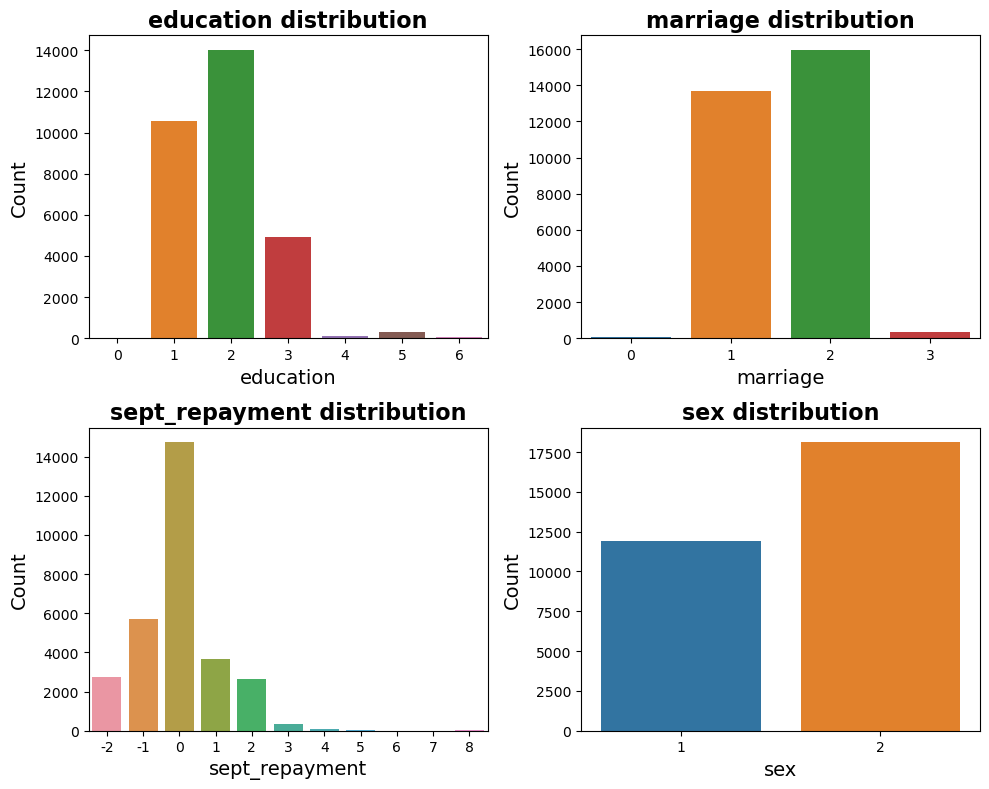

In [27]:
# Visually see how undocumented values are distributed 
columns = ['education', 'marriage', 'sept_repayment', 'sex']

fig, axes = plt.subplots(nrows=int((len(columns) - 1) / 2) + 1, ncols=2, figsize=(10, 8))

# Flatten axes in case there's only one row
axes = axes.ravel()

for i, col in enumerate(columns):
    try: 
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col} distribution', fontsize=16, fontweight='bold')
        axes[i].set_xlabel(f'{col}', fontsize=14)
        axes[i].set_ylabel('Count', fontsize=14)
    except IndexError:
        # If all subplots are used, break the loop
        break
        
# Make sure any unused axes don't have titles or labels
#for ax in axes[i:]:
#    ax.axis('off')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

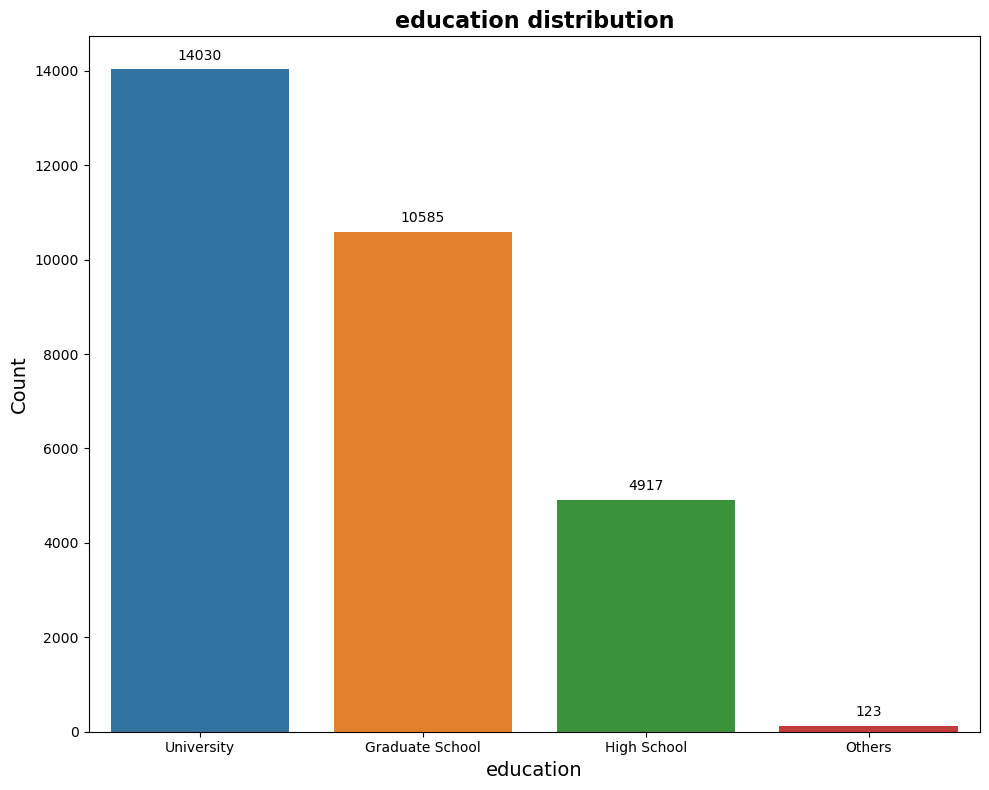

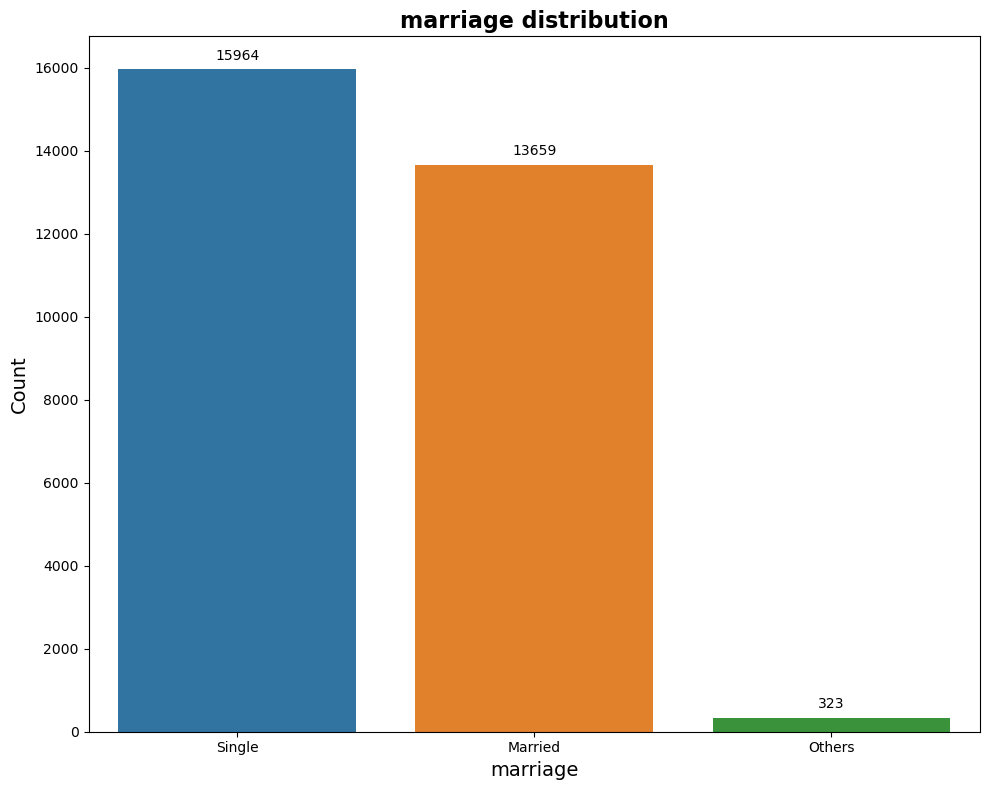

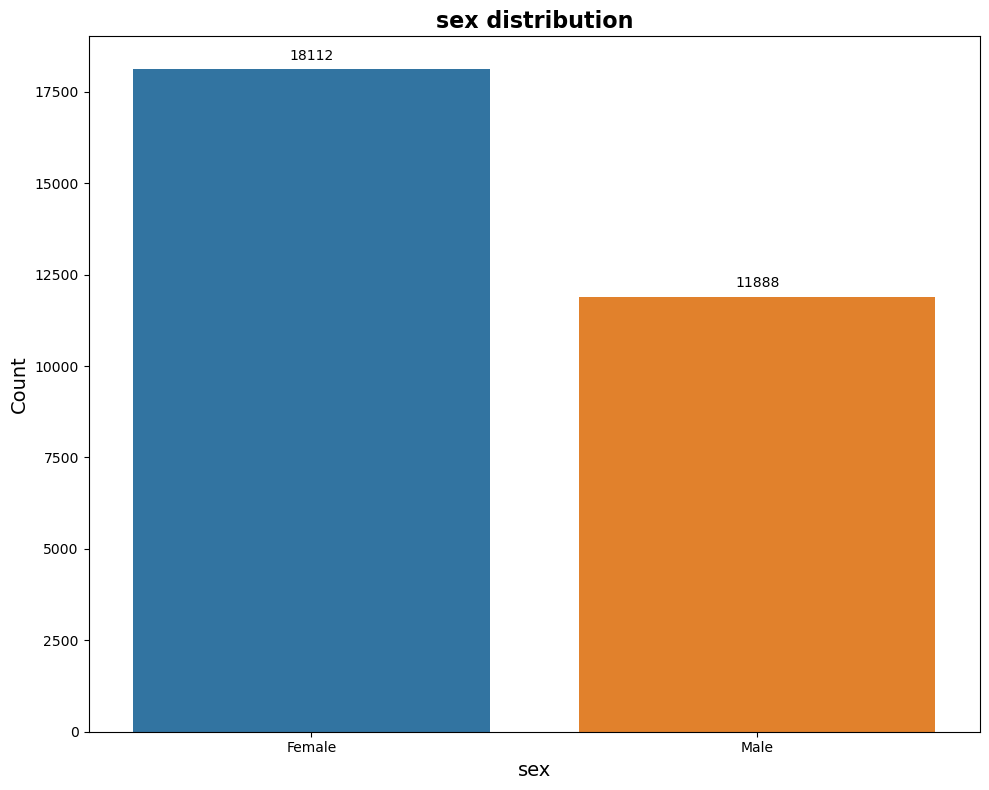

In [28]:
# Define custom labels for each categorical column
labels = {
    'education': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
    'marriage': {1: 'Married', 2: 'Single', 3: 'Others'},
    'sex': {1: 'Male', 2: 'Female'}
}

for column in labels:
    # Create a copy of the column with mapped values
    df[f'{column}_labeled'] = df[column].map(labels[column])

    plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
    order = df[f'{column}_labeled'].value_counts().index
    ax = sns.countplot(data=df, x=f'{column}_labeled', order=order)
    # Add text annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    plt.title(f'{column} distribution', fontsize=16, fontweight='bold')
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ha='center', rotation=0)
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

In [29]:
# Percentage of distribution 
print(round((df['education_labeled'].value_counts()/df.shape[0]) * 100,2))
print('\n')
print(round((df['marriage_labeled'].value_counts()/df.shape[0]) * 100,2))
print('\n')
print(round((df['sex_labeled'].value_counts()/df.shape[0]) * 100,2))

education_labeled
University         46.77
Graduate School    35.28
High School        16.39
Others              0.41
Name: count, dtype: float64


marriage_labeled
Single     53.21
Married    45.53
Others      1.08
Name: count, dtype: float64


sex_labeled
Female    60.37
Male      39.63
Name: count, dtype: float64


### How is age distributed?

C:\Users\ohins\anaconda3\envs\Python3_12_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


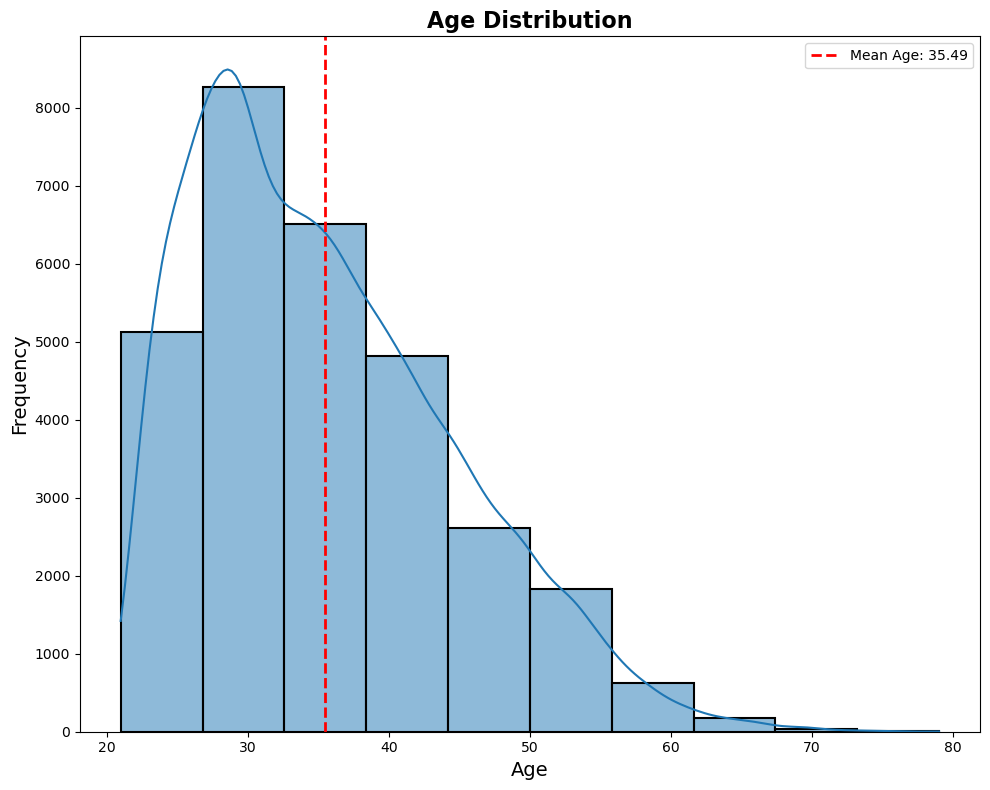

In [31]:
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
ax = sns.histplot(data=df, x='age', bins=10, kde=True, edgecolor='black', linewidth=1.5)

# Calculate and plot the mean
mean_age = df['age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ha='center', rotation=0)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Repayment Status

In [33]:
# Create a base DataFrame
base_df = copy_df[['id', 'default_payment_next_month']]

# Melt payment status columns
payment_status_cols = ['id'] + [col for col in copy_df.columns if col.startswith('pay_')]
payment_status_df = pd.melt(copy_df[payment_status_cols], id_vars=['id'], var_name='month', value_name='payment_status')
month_mapping = {'pay_0': 'September', 'pay_2': 'August', 'pay_3': 'July', 'pay_4': 'June', 'pay_5': 'May', 'pay_6': 'April'}
payment_status_df['month'] = payment_status_df['month'].map(month_mapping)

# Melt bill amount columns
bill_amount_cols = ['id'] + [col for col in copy_df.columns if col.startswith('bill_amt')]
bill_amount_df = pd.melt(copy_df[bill_amount_cols], id_vars=['id'], var_name='month', value_name='bill_amt')
month_mapping_bill = {'bill_amt1': 'September', 'bill_amt2': 'August', 'bill_amt3': 'July', 'bill_amt4': 'June', 'bill_amt5': 'May', 'bill_amt6': 'April'}
bill_amount_df['month'] = bill_amount_df['month'].map(month_mapping_bill)

# Melt payment amount columns
payment_amount_cols = ['id'] + [col for col in copy_df.columns if col.startswith('pay_amt')]
payment_amount_df = pd.melt(copy_df[payment_amount_cols], id_vars=['id'], var_name='month', value_name='payment_amt')
month_mapping_pay = {'pay_amt1': 'September', 'pay_amt2': 'August', 'pay_amt3': 'July', 'pay_amt4': 'June', 'pay_amt5': 'May', 'pay_amt6': 'April'}
payment_amount_df['month'] = payment_amount_df['month'].map(month_mapping_pay)

# Merge DataFrames
merged_df = pd.merge(payment_status_df, bill_amount_df, on=['id', 'month'], how='outer')
merged_df = pd.merge(merged_df, payment_amount_df, on=['id', 'month'], how='outer')

# Merge with base DataFrame
final_df = pd.merge(base_df, merged_df, on=['id'], how='outer')

In [34]:
# View dataset
final_df

,id,default_payment_next_month,month,payment_status,bill_amt,payment_amt
0,1,1,September,2,3913.0,0.0
1,1,1,August,2,3102.0,689.0
2,1,1,July,-1,689.0,0.0
3,1,1,June,-1,0.0,0.0
4,1,1,May,-2,0.0,0.0
...,...,...,...,...,...,...
359995,30000,1,NaN,1800,NaN,NaN
359996,30000,1,NaN,1430,NaN,NaN
359997,30000,1,NaN,1000,NaN,NaN
359998,30000,1,NaN,1000,NaN,NaN


In [35]:
# Drop NaN values 
# These values repeat ID number, but since there are only 6 months of data, it tries to find additional months data, which isn't there
final_df.dropna(inplace=True)

In [36]:
# Drop unnecessary columns 
final_df.drop(['id', 'default_payment_next_month'], axis=1, inplace=True)

In [37]:
# View dataset
final_df

,month,payment_status,bill_amt,payment_amt
0,September,2,3913.0,0.0
1,August,2,3102.0,689.0
2,July,-1,689.0,0.0
3,June,-1,0.0,0.0
4,May,-2,0.0,0.0
...,...,...,...,...
359989,August,0,48905.0,1800.0
359990,July,0,49764.0,1430.0
359991,June,0,36535.0,1000.0
359992,May,0,32428.0,1000.0


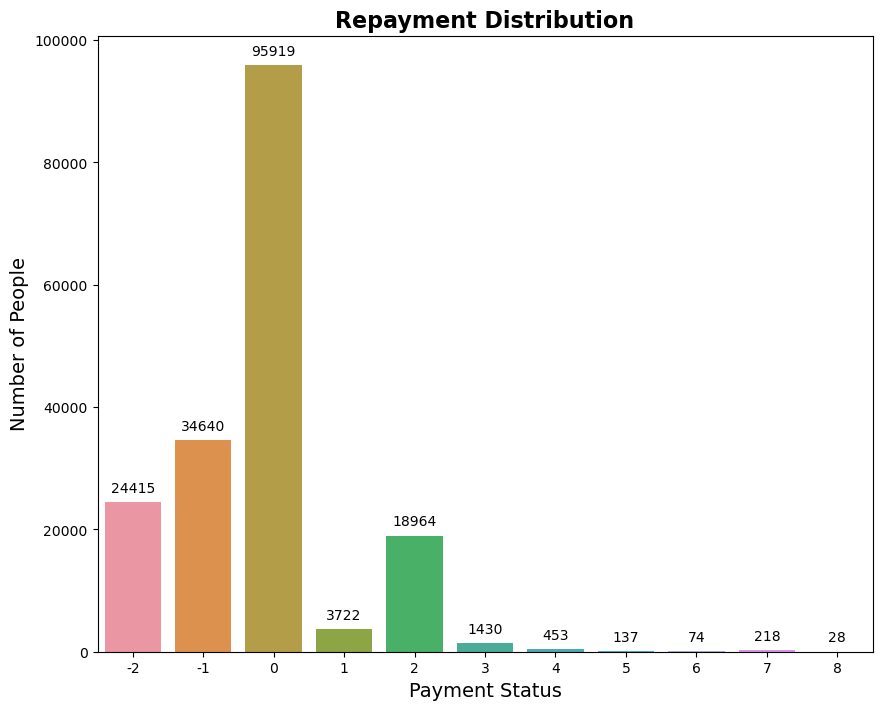

payment_status
 0    53.29
-1    19.24
-2    13.56
 2    10.54
 1     2.07
 3     0.79
 4     0.25
 7     0.12
 5     0.08
 6     0.04
 8     0.02
Name: count, dtype: float64


In [38]:
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

ax = sns.countplot(final_df, x='payment_status')

# Add text annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xlabel('Payment Status', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.title('Repayment Distribution', fontsize=16, fontweight='bold')
plt.show()

# Percentage of distribution 
print(round((final_df['payment_status'].value_counts()/final_df.shape[0]) * 100,2))

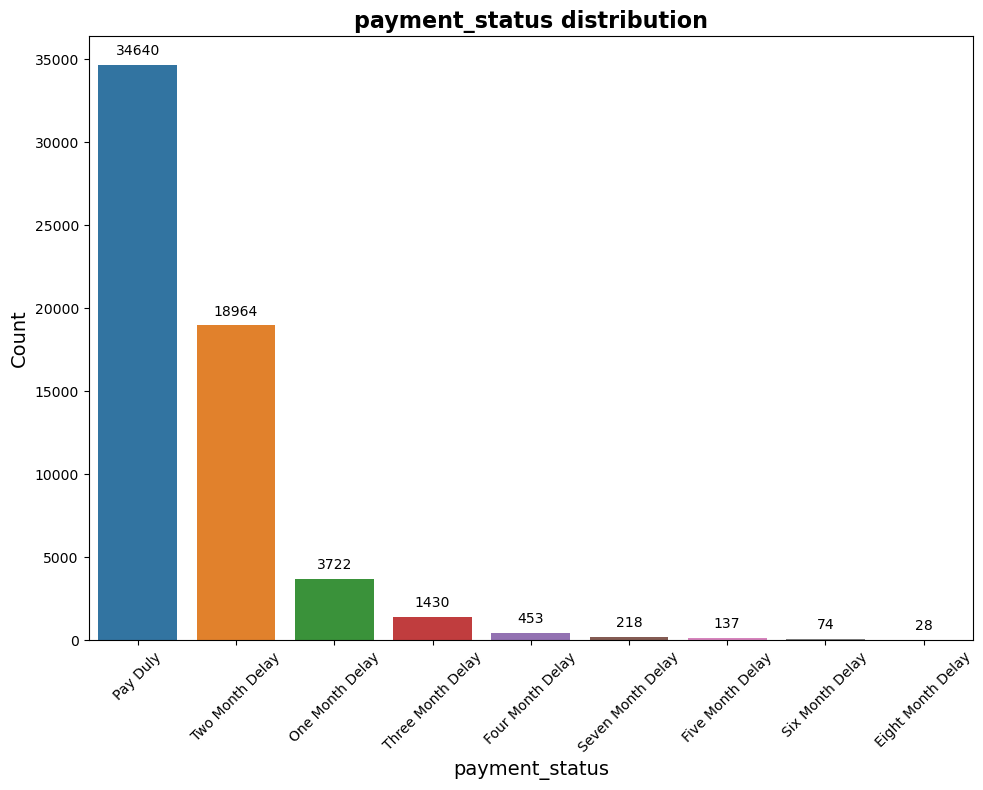

In [39]:
# Define custom labels for each categorical column
labels = {
    'payment_status': {-1: 'Pay Duly', 1: 'One Month Delay', 2: 'Two Month Delay', 3: 'Three Month Delay', 4: 'Four Month Delay',
                      5: 'Five Month Delay', 6: 'Six Month Delay', 7: 'Seven Month Delay', 8: 'Eight Month Delay'}
}

for column in labels:
    # Create a copy of the column with mapped values
    final_df[f'{column}_labeled'] = final_df[column].map(labels[column])

    plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
    order = final_df[f'{column}_labeled'].value_counts().index
    ax = sns.countplot(data=final_df, x=f'{column}_labeled', order=order)
    # Add text annotations
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    plt.title(f'{column} distribution', fontsize=16, fontweight='bold')
    plt.xlabel(f'{column}', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ha='center', rotation=45)
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

In [40]:
# Percentage of distribution 
print(round((final_df['payment_status_labeled'].value_counts()/final_df.shape[0]) * 100,2))

payment_status_labeled
Pay Duly             19.24
Two Month Delay      10.54
One Month Delay       2.07
Three Month Delay     0.79
Four Month Delay      0.25
Seven Month Delay     0.12
Five Month Delay      0.08
Six Month Delay       0.04
Eight Month Delay     0.02
Name: count, dtype: float64


### Outlier Analysis

In [82]:
# Calculate descriptive statistics for bill_amt
final_df.groupby('month')['bill_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
August,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
July,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
June,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
May,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
September,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [84]:
# Calculate descriptive statistics for payment_amt
final_df.groupby('month')['payment_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0
August,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
July,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
June,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
May,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
September,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


<Axes: title={'center': 'bill_amt'}, xlabel='[month]'>

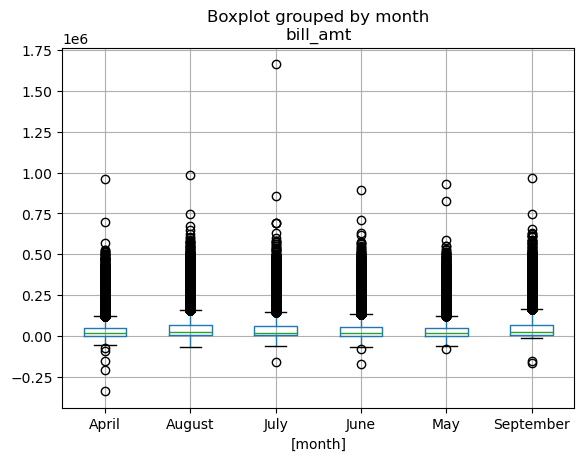

In [76]:
final_df[['month','bill_amt']].boxplot(by='month')

In [ ]:
# Function to detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]



**Remove Columns to Avoid Any Biases and Imbalance**

In [43]:
# Will have information leakage from the following columns 
#df.drop(['id', 'limit_bal'], axis=1, inplace=True)

#print('Columns remaining: ', df.shape[1])

## Week 2 & 3: Feature Engineering and Model Selection

## Week 4: Deployment